In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
fruits = pd.DataFrame({
    'color': ['Green','Yellow','Red','Red','Yellow'],
    'Diameter': [3,3,1,1,3],
    'Label':['Apple','Apple','Grape','Grape','Lemon']
})
display(fruits)

,color,Diameter,Label
0,Green,3,Apple
1,Yellow,3,Apple
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon


## We have to encode string values

In [8]:
from sklearn.preprocessing import LabelEncoder
le_color = LabelEncoder()
le_label = LabelEncoder()

In [10]:
fruits['color_n'] = le_color.fit_transform(fruits['color'])
fruits['label_n'] = le_label.fit_transform(fruits['Label'])
display(fruits)

,color,Diameter,Label,color_n,label_n
0,Green,3,Apple,0,0
1,Yellow,3,Apple,2,0
2,Red,1,Grape,1,1
3,Red,1,Grape,1,1
4,Yellow,3,Lemon,2,2


In [13]:
fruitsToTrain = fruits[['color_n', 'Diameter']]
display(fruitsToTrain)

,color_n,Diameter
0,0,3
1,2,3
2,1,1
3,1,1
4,2,3


In [15]:
target = fruits['label_n']
target

0    0
1    0
2    1
3    1
4    2
Name: label_n, dtype: int32

In [16]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [19]:
myTree = clf.fit(fruitsToTrain, target)

In [18]:
import graphviz

In [28]:
classLabel = fruits['Label'].unique().tolist()
classLabel

['Apple', 'Grape', 'Lemon']

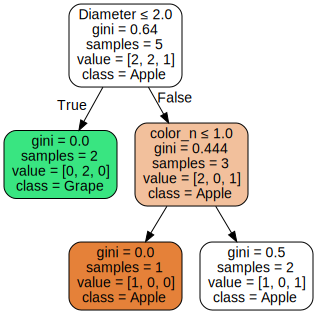

In [29]:
# tree.plot_tree(mytree)
dot_data = tree.export_graphviz(myTree, 
                                out_file=None, 
                                feature_names=fruitsToTrain.columns.tolist(),  
                                class_names=classLabel,  
                                filled=True, rounded=True,  
                                special_characters=True
                               )  
graph = graphviz.Source(dot_data)  
graph

In [30]:
fruits

,color,Diameter,Label,color_n,label_n
0,Green,3,Apple,0,0
1,Yellow,3,Apple,2,0
2,Red,1,Grape,1,1
3,Red,1,Grape,1,1
4,Yellow,3,Lemon,2,2
